In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.feature_selection import mutual_info_classif

pd.plotting.register_matplotlib_converters()
%matplotlib inline

%load_ext autoreload
%autoreload 2
from help_tool import help_tool


# Setting graph parameters
sns.set_theme(style='whitegrid')
sns.set_palette('husl')

In [3]:
bureau_balance = help_tool.csv_download(r'Archive\home-credit-default-risk\bureau_balance.csv')
help_tool.first_look(bureau_balance)

Dataset has 27299925 observations and 3 features
Columns with all empty values []
Dataset has 0 duplicates


,dtypes,"Null values, Count","Null values, %"
SK_ID_BUREAU,int64,0,0.0
MONTHS_BALANCE,int64,0,0.0
STATUS,object,0,0.0


In [4]:
#pd.set_option('display.max_rows', 122)

In [5]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [14]:
bureau_balance['STATUS'].replace('X', np.nan, inplace=True)
bureau_balance['STATUS'].replace('C', -1, inplace=True)

bureau_balance['STATUS']=bureau_balance['STATUS'].astype(float)

In [7]:
bureau_balance['STATUS'].isna().sum()

5810482

In [8]:
bureau_balance[bureau_balance['SK_ID_BUREAU'] == 5715448]

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,-1
1,5715448,-1,-1
2,5715448,-2,-1
3,5715448,-3,-1
4,5715448,-4,-1
5,5715448,-5,-1
6,5715448,-6,-1
7,5715448,-7,-1
8,5715448,-8,-1
9,5715448,-9,0


In [13]:
bureau_balance['STATUS'].value_counts()

STATUS
-1    13646993
0      7499507
1       242347
5        62406
2        23419
3         8924
4         5847
Name: count, dtype: int64

In [17]:
bureau_balance[#(bureau_balance['STATUS']==4)
               #&
               (bureau_balance['SK_ID_BUREAU']==5230729)
               ]

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
30207,5230729,0,-1.0
30208,5230729,-1,-1.0
30209,5230729,-2,-1.0
30210,5230729,-3,-1.0
30211,5230729,-4,-1.0
30212,5230729,-5,-1.0
30213,5230729,-6,-1.0
30214,5230729,-7,-1.0
30215,5230729,-8,-1.0
30216,5230729,-9,-1.0


In [9]:
from sklearn.impute import KNNImputer

In [18]:
# # KNNImputer for NaN values

# imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

# imputed_data = imputer.fit_transform(bureau_balance)

# # Convert the numpy array back to a DataFrame
# imputed_df = pd.DataFrame(imputed_data, columns=bureau_balance.columns)

In [19]:
bureau = help_tool.csv_download(r'Archive\home-credit-default-risk\bureau.csv')
help_tool.first_look(bureau)

Dataset has 1716428 observations and 17 features
Columns with all empty values []
Dataset has 0 duplicates


,dtypes,"Null values, Count","Null values, %"
SK_ID_CURR,int64,0,0.0
SK_ID_BUREAU,int64,0,0.0
CREDIT_ACTIVE,object,0,0.0
CREDIT_CURRENCY,object,0,0.0
DAYS_CREDIT,int64,0,0.0
CREDIT_DAY_OVERDUE,int64,0,0.0
DAYS_CREDIT_ENDDATE,float64,105553,6.1
DAYS_ENDDATE_FACT,float64,633653,36.9
AMT_CREDIT_MAX_OVERDUE,float64,1124488,65.5
CNT_CREDIT_PROLONG,int64,0,0.0


In [22]:
bureau[bureau['SK_ID_BUREAU'] == 5230729]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
53601,132009,5230729,Closed,currency 1,-1476,0,-1293.0,-1183.0,235.44,0,23622.435,0.0,0.0,0.0,Consumer credit,-1070,NaN


In [21]:
bureau['CREDIT_ACTIVE'].value_counts()

CREDIT_ACTIVE
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: count, dtype: int64

In [21]:
bureau['CREDIT_TYPE'].value_counts()

CREDIT_TYPE
Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: count, dtype: int64

In [22]:
bureau['CREDIT_CURRENCY'].value_counts()

CREDIT_CURRENCY
currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: count, dtype: int64

<Axes: >

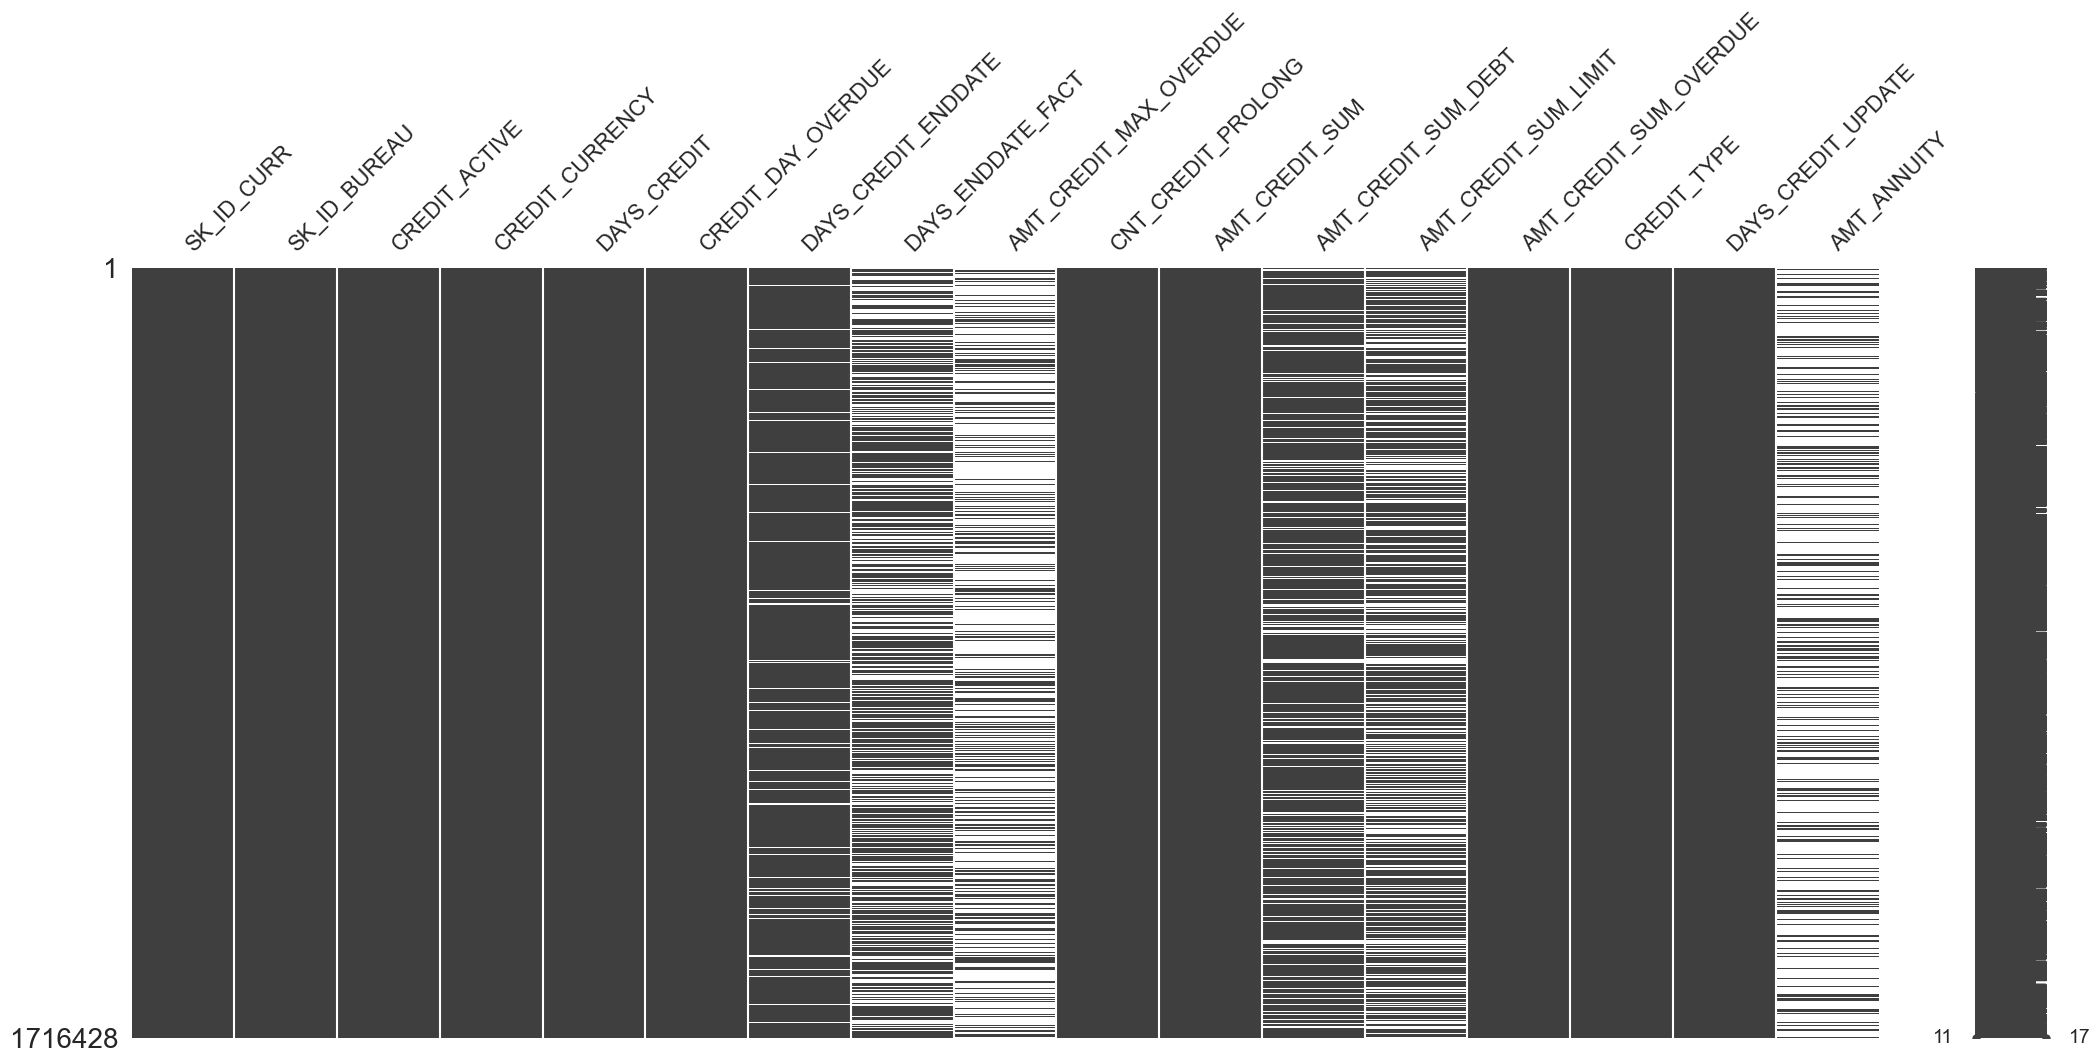

In [24]:
msno.matrix(bureau)